In [22]:
# Load libraries
# remove unused imports in final project if code is turned in
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import sklearn.metrics as met

In [23]:
# load the dataset
dataset = read_csv('Raisin_Dataset_CSV.csv', header=0)
# summarize the dataset
dataset.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [24]:
# count the missing values
dataset.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [25]:
# locate the column with the 99999 values
num_missing = (dataset == 99999).sum()
print(num_missing)
# find and print the indices
for col in dataset:
    if num_missing[col] != 0:
        indices = dataset[dataset[col] == 99999].index
        print(col + ":" + str(list(indices)))

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


In [26]:
# locate the column with the 0 values
num_missing = (dataset == 0).sum()
print(num_missing)
# find and print the indices
for col in dataset:
    if num_missing[col] != 0:
        indices = dataset[dataset[col] == 0].index
        print(col + ":" + str(list(indices)))

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


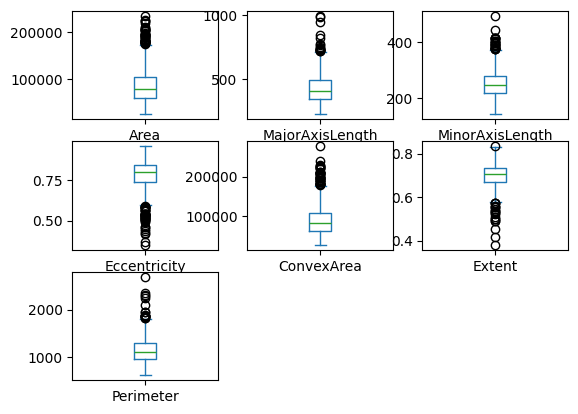

In [27]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [68]:
threshold_z = 3
outlier_indices = []
for col in dataset:
    if col != "Class":
        z = np.abs(stats.zscore(dataset[col]))
        outlier_indices_col = np.where(z > threshold_z)[0]
        outlier_indices.extend(outlier_indices_col)
print(outlier_indices)
no_outliers = dataset.drop(outlier_indices)

[487, 507, 552, 580, 581, 668, 708, 804, 812, 866, 880, 85, 487, 506, 694, 836, 490, 552, 581, 616, 769, 804, 880, 13, 23, 34, 43, 106, 156, 192, 197, 235, 251, 253, 316, 356, 483, 880, 85, 487, 506, 694, 708, 804, 812, 836, 866, 880, 85, 290, 459, 487, 498, 506, 536, 579, 682, 694, 802, 829, 836, 85, 290, 487, 506, 694, 836]


In [69]:

no_outliers.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000
mean,85689.111628,425.399183,251.839739,0.785030,88762.722093,0.701263,1150.554856
std,35714.789417,105.363100,46.579123,0.079252,36697.834521,0.046813,245.921977
min,25387.000000,225.629541,143.710872,0.517135,26139.000000,0.547433,619.074000
25%,59230.500000,345.829099,218.450742,0.744472,61489.250000,0.671999,966.013750
50%,78122.500000,405.796609,246.643156,0.798846,80835.500000,0.706631,1113.375500
75%,103121.000000,486.582391,277.440665,0.840973,107340.500000,0.733665,1295.296750
max,204226.000000,769.425149,403.719328,0.928094,209580.000000,0.835455,1893.414000


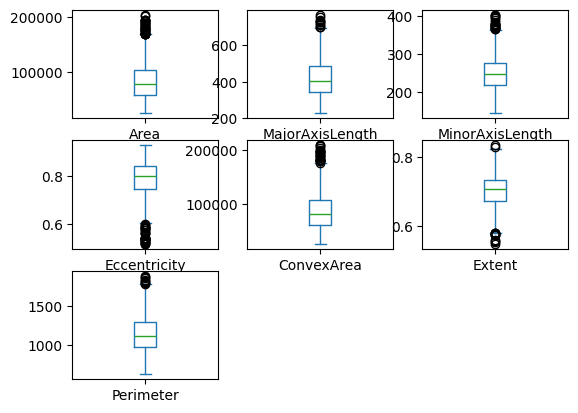

In [70]:
no_outliers.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()